# Logistic Regression

* Logistic regression is used for solving the classification problems.
* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
* The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

## Types of Logistic Regression:
* Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.

* Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"

* Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

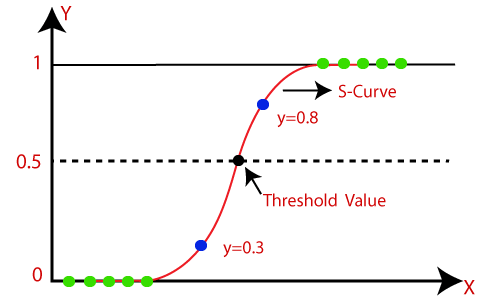

## Logistic Function (Sigmoid Function):
* The sigmoid function is a mathematical function used to map the predicted values to probabilities.
* It maps any real value into another value within a range of 0 and 1.
* The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.
* In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

## Assumptions for Logistic Regression:
* The dependent variable must be categorical in nature.
* The independent variable should not have multi-collinearity.

## Logistic Regression Equation:
The Logistic regression equation can be obtained from the Linear Regression equation.

* We know the equation of the straight line can be written as:
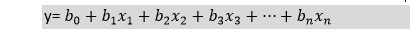


* In Logistic Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y):
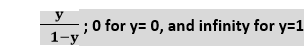



* But we need range between -[infinity] to +[infinity], then take logarithm of the equation it will become:
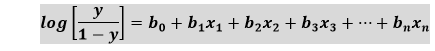

## Advantages of Logistic Regression
* It is easier to implement, interpret, and very efficient to train.
* It makes no assumptions about distributions of classes in feature space.
* It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.
* It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).
* It is very fast at classifying unknown records.
* Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.
* Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.One may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios.

## Disadvantages 
* If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
* The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.
* Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios.
* Logistic Regression requires average or no multicollinearity between independent variables.
* Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

In [1]:
# Data Pre-procesing Step  
# importing libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
  
# importing datasets  
df= pd.read_csv('Heart.csv')  
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Extracting Independent and dependent Variable  
X= df.iloc[:,:-1].values 
y= df.iloc[:,-1].values

In [3]:
print(df['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [4]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [5]:
# Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(C=100,solver='liblinear')  
classifier.fit(X_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(X_test) 

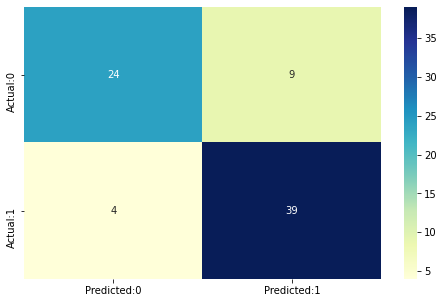

In [6]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [7]:
acc_score=accuracy_score(y_test, y_pred)
acc_score

0.8289473684210527

In [8]:
print('Model accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8289


y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [9]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.8546
Test set score: 0.8289


The model is overfitting since the test set score is less than the training set score.

In [10]:
from sklearn.metrics import accuracy_score,roc_curve,classification_report

print("Accuracy of Logistic Regression:", acc_score*100,'\n')
print(classification_report(y_test,y_pred))

Accuracy of Logistic Regression: 82.89473684210526 

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



Support is the actual number of occurrences of the class in our dataset.

* A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

* ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

* ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting.

In [20]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9019


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
#from sklearn.metrics import roc_curve, roc_acc_score
from sklearn.linear_model import LogisticRegression  
logis_classifier= LogisticRegression()  
logis_classifier.fit(X_train, y_train)
ytrain_pred = logis_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = logis_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.928415300546448
Logistic test roc-auc: 0.8886539816772375


In [25]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logis_classifier.predict_proba(X_test)[:, 1]
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,y_pred1)))


Ensemble test roc-auc: 0.8886539816772375


In [30]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
thresholds

array([1.99378621, 0.99378621, 0.93520325, 0.93484084, 0.91025954,
       0.86644261, 0.84749805, 0.84612996, 0.77954594, 0.7765465 ,
       0.75958337, 0.69712833, 0.66425569, 0.65358247, 0.65118712,
       0.64728426, 0.50863382, 0.50650751, 0.46859075, 0.15042444,
       0.14338669, 0.07791224, 0.07195245, 0.00435054])

In [29]:

from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_predd = np.where(y_pred1>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_predd, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
17,0.506508,0.855263
18,0.468591,0.842105
16,0.508634,0.842105
15,0.647284,0.828947
13,0.653582,0.828947


In [32]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

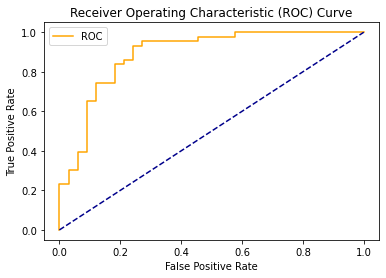

In [33]:
plot_roc_curve(fpr,tpr)

### Hyperparameter Optimization using GridSearch CV

In [11]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = classifier,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=100, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [12]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8240


Parameters that give the best results : 

 {'C': 1}


Estimator that was chosen by the search : 

 LogisticRegression(C=1, solver='liblinear')


In [13]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8289


In [14]:
# Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(C=1,solver='liblinear')  
classifier.fit(X_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(X_test) 

In [15]:
from sklearn.metrics import accuracy_score,roc_curve,classification_report

print("Accuracy of Logistic Regression:", acc_score*100,'\n')
print(classification_report(y_test,y_pred))

Accuracy of Logistic Regression: 82.89473684210526 

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76

